In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot=True, reshape=False)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
X_train = data.train.images
y_train = data.train.labels

X_test = data.test.images
y_test = data.test.labels

In [4]:
print (X_train.shape)
print (y_train.shape)

(55000, 28, 28, 1)
(55000, 10)


In [5]:
index2label = {0 : "T-shirt/top",
               1 : "Trouser",
               2 : "Pullover",
               3 : "Dress",
               4 : "Coat",
               5 : "Sandal",
               6 : "Shirt",
               7 : "Sneaker",
               8 : "Bag",
               9 : "Ankle boot",
              }

In [6]:
def display_digit(x, y, i):
    s = [i for i,x in enumerate(y_train[i]) if x == 1]
    label = index2label.get(s[0])
    image = x[i].reshape([28,28])
    plt.title('Example: %d  Label: %s' % (i, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

def display_mult_flat(start, stop, x):
    images = x[start].reshape([1,784])
    for i in range(start + 1, stop):
        images = np.concatenate((images, x[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray'))
    plt.show()

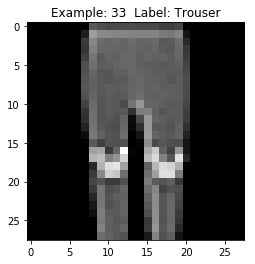

In [7]:
display_digit(X_train, y_train, 33)

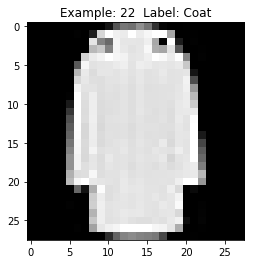

In [8]:
display_digit(X_train, y_train, 22)

In [9]:
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y_ = tf.placeholder(tf.float32, shape=(None, 10))

In [10]:
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.ones([32])/10)

W2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
B2 = tf.Variable(tf.ones([64])/10)

W3 = tf.Variable(tf.truncated_normal([4, 4, 64, 128], stddev=0.1))
B3 = tf.Variable(tf.ones([128])/10)

W4 = tf.Variable(tf.truncated_normal([7 * 7 * 128, 256], stddev=0.1))
B4 = tf.Variable(tf.ones([256])/10)

W5 = tf.Variable(tf.truncated_normal([256, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

In [11]:
filter_stride_size_1 = 1
filter_stride_size_2 = 2
filter_stride_size_3 = 2
pool_size = 2
pool_stride = 1

In [12]:
L1 = tf.nn.conv2d(X, W1, strides = [1, filter_stride_size_1, filter_stride_size_1, 1], padding = "SAME")
L1 = tf.nn.bias_add(L1, B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, pool_size, pool_size, 1], strides = [1, pool_stride, pool_stride, 1],
                               padding = "SAME")

In [13]:
L2 = tf.nn.conv2d(L1, W2, strides = [1, filter_stride_size_2, filter_stride_size_2, 1], padding = "SAME")
L2 = tf.nn.bias_add(L2, B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1, pool_size, pool_size, 1], strides = [1, pool_stride, pool_stride, 1],
                               padding = "SAME")

In [14]:
L3 = tf.nn.conv2d(L2, W3, strides = [1, filter_stride_size_3, filter_stride_size_3, 1], padding = "SAME")
L3 = tf.nn.bias_add(L3, B3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1, pool_size, pool_size, 1], strides = [1, pool_stride, pool_stride, 1],
                               padding = "SAME")

In [15]:
L4 = tf.reshape(L3, [-1, 7*7*128])

In [16]:
L5 = tf.add(tf.matmul(L4, W4), B4)
L5 = tf.nn.relu(L5)

In [17]:
y = tf.add(tf.matmul(L5, W5), B5)
y.shape
#y_.shape

TensorShape([Dimension(None), Dimension(10)])

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_)) 

In [19]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [20]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
train = tf.train.AdamOptimizer(0.003).minimize(cost)

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [27]:
for i in range(200):
    batch_xs, batch_ys = data.train.next_batch(128)
    _, loss, acc = sess.run([train, cost, accuracy], feed_dict={X: batch_xs, y_: batch_ys})
    
    if (i % 40 == 0):
        print("Epoch: {}, Loss: {}, Accuracy: {} ".format(i, loss, acc))

Epoch: 0, Loss: 0.5242922306060791, Accuracy: 0.8125 
Epoch: 40, Loss: 0.3588685989379883, Accuracy: 0.8984375 
Epoch: 80, Loss: 0.35609447956085205, Accuracy: 0.875 
Epoch: 120, Loss: 0.36588385701179504, Accuracy: 0.875 
Epoch: 160, Loss: 0.4428861737251282, Accuracy: 0.8359375 


In [28]:
print("Test Accuracy:{}".format(sess.run([accuracy], feed_dict={X: data.test.images,
                                      y_: data.test.labels})))

Test Accuracy:[0.86610001]
